##  Regresja liniowa

Regresja liniowa to tworzenie modeli przedstawiających wielkość, której wartość chcemy przewidzieć (zmienna zależna) jako kombinację liniową predyktorów (zmiennych zależnych).

Struktura modelu ma postać

$$\tilde{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

lub w formie macierzowej 

$$\tilde{\mathbf{y}} = \mathbf{[1\  X ]} \beta$$

gdzie wektor wartości zmiennych zależnych jest przewidywany na podstawie macierzy danych i wektora współczynników $\beta$.

Współczynnik $\beta_0$ w nomentkalturze anglojęzycznej jest nazywany *intercept* ponieważ jest to punkt przecięcia się z osią $y$ gdy wszystkie predyktory są równe 0.

Aby wyznaczyć parametry modelu liniowego potrzebujemy wektora danych uczących, tj. znanych nam wartości zmiennej zależnej  $\mathbf{y}$ oraz odpowiadająxcej mu macierzy predyktorów $\mathbf{X}$. Macierz predyktorów nosi nazwę *design matrix*, i bardzo użytyeczne do jej wyznaczenia (w oparciu o dane w forme dataframe) jest pakiet [patsy](https://patsy.readthedocs.io/en/latest/quickstart.html), a w szczególności funkcja ```dmatrices```.


Model regresyjny ma mocne umocowanie statystyczne, jednak w ramach zajęć będziemy traktować go machinistycznie jak jedną z metod uczenia maszynowego. Do tworzenia takich modeli służy klasa ```LinearRegression```

Do analizy regresji liniowej wykorzystywać będziemy pakiet ```scikit-learn``` oraz zawarte w nim klasy, głównie w modułach ```linear_model```, ```metrics``` oraz ```model_selection```. 

### Dane uczące i dane testowe

Zazwyczaj rozwiązując problem nie mamy dostępu do dodatkowych danych testowych uzupełniających nasze dane uczące. Dlatego też, popularną praktyką jest podzielenie posiadanego zbioru danych w sposób losowy na dwa zbiory: uczący i testowy. Do tego służy funkcja ```train_test_split``` z modułu ```model_selection```. 



### Zadanie 1
Na podstawie danych zawartych w pliku SCORES.csv wykonaj i oceń regresję liniową, gdzie Twoją daną niezależną (predyktorem) będą godziny poświęcone na przygotowanie, a wynikową uzyskane punkty. Wykonanie zadania powinno składać się z następujących kroków:
1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytaj dane z pliku SCORES.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Wykonaj wstępny wykres uzyskanych danych (typu "scatter")
4. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zaleznych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (30%)
5. Utwróz model regresji liniowej za pomocą sklearn.
6. Wypisz i przeanalizuj wyliczone wskaźniki dla modelu: coef_ oraz intercept_. Czym one są i do czego służą?
7. Wykorzystając stworozny model dokonaj predykcji dla części testowej X. Porównaj wynik (y_pred) z posiadanymi danymi (y_test).
8. Wykonaj wykres konfrontujący dane testowe (X_test, y_test; typu "scatter") oraz predykcje (X_test, y_pred; linia prosta)
9. Dokonaj walidacji uzyskanych predykcji wykorzystując metryki: średni błąd bezwzględny (Mean Absolute Error), błąd średniokwadratowy (Mean Squared Error) oraz pierwiastek błędu średniokwadratowego (Root Mean Squared Error).

Następnie utworzony skrypt wykorzystaj na danych zawartych w SBP.csv, gdzie predyktorem będzie wiek, a wynikiem ciśnienie (SBP). Czy uzyskane wyniki z modelu są równie zadowalające?

In [1]:
import numpy as np
import pandas as pd
import sklearn.model_selection as sms
import sklearn.linear_model as slm
import sklearn.metrics as slmt
import matplotlib.pyplot as plt
from patsy import dmatrices, dmatrix, demo_data
import random
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

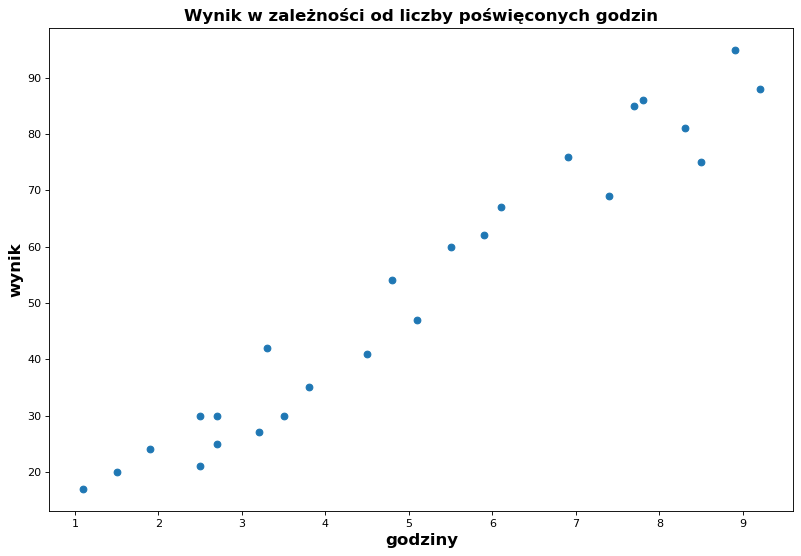

Współczynnik dla problemu liniowej regresji: [[0.         9.78856669]]
Punkt przecięcia z osią wspołrzędnych [2.37081538]

Y_testowe Y_przewidziane
[20.]        [17.05366541]
[27.]        [33.69422878]
[69.]        [74.80620886]
[30.]        [26.8422321]
[62.]        [60.12335883]
[35.]        [39.56736879]
[24.]        [20.96909209]
[86.]        [78.72163554]


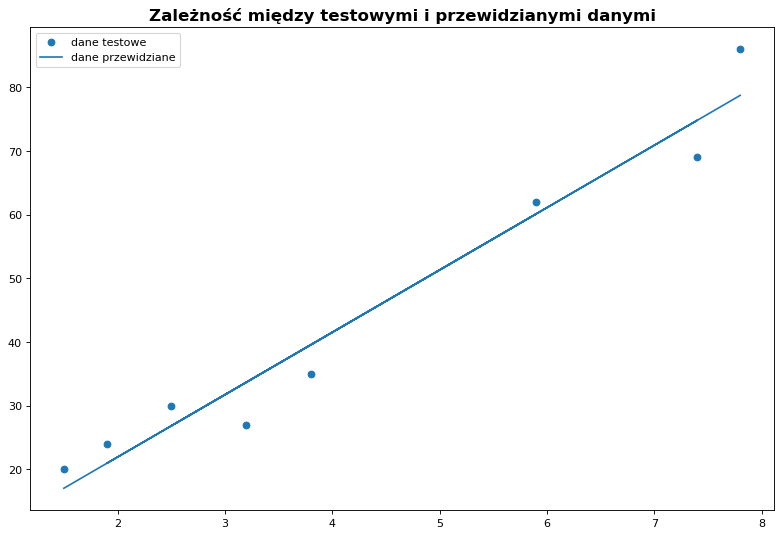

Średni błąd bezwzględny: 4.419727808027659
Błąd średniokwadratowy: 4.792191274636316
Pierwiastek błędu średniokwadratowego : 22.96509721270044



In [2]:
df = pd.read_csv("SCORES.csv")
#3
plt.figure(figsize=(12, 8), dpi=80)
plt.scatter(df['Hours'],df['Scores'])

plt.title("Wynik w zależności od liczby poświęconych godzin",fontsize=15, weight='bold')
plt.xlabel("godziny", fontsize=15, weight='bold')
plt.ylabel("wynik", fontsize=15, weight='bold')
plt.show()

#4
y, X = dmatrices("Scores ~ Hours",df)
X_train, X_test, y_train, y_test = sms.train_test_split(X, y, test_size=0.30, random_state=0)
#5
clf = slm.LinearRegression()
clf.fit(X_train,y_train)

#6
print("Współczynnik dla problemu liniowej regresji:", clf.coef_)
print("Punkt przecięcia z osią wspołrzędnych", clf.intercept_)

#7
y_pred = clf.predict(X_test)
y_testA = y_test
print("")
print("Y_testowe", "Y_przewidziane")
for i in range(len(y_test)):
    print(y_testA[i],"      ",y_pred[i])


#8
plt.figure(figsize=(12, 8), dpi=80)
plt.title("Zależność między testowymi i przewidzianymi danymi", fontsize=15, weight='bold')
plt.scatter(X_test[:, 1], y_testA,  label="dane testowe")
plt.plot(X_test[:,1], y_pred, label = "dane przewidziane")
plt.legend()
plt.show()


print(f"Średni błąd bezwzględny: {mean_absolute_error(y_test, y_pred)}")
print(f"Błąd średniokwadratowy: {mean_squared_error(y_test, y_pred, squared=False)}")
print(f"Pierwiastek błędu średniokwadratowego : {mean_squared_error(y_test, y_pred, squared=True)}\n")

PRZYKŁAD 2

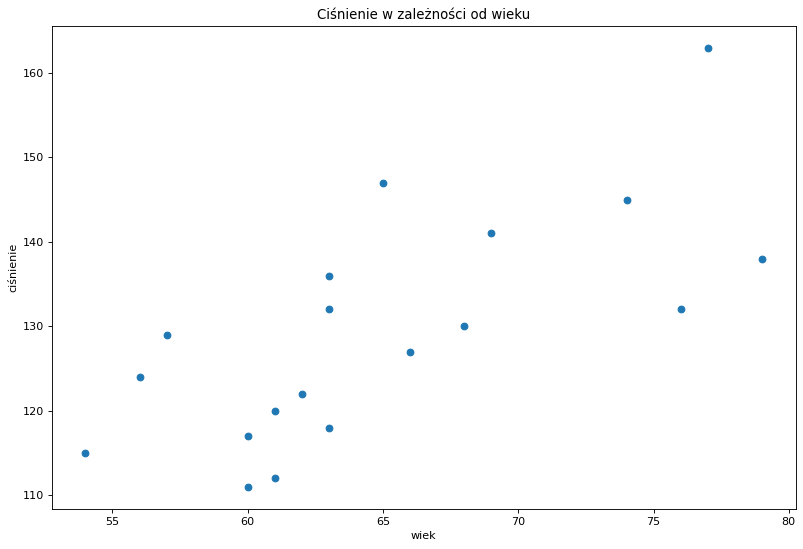

Współczynnik dla problemu liniowej regresji: [[0.         1.26963851]]
Punkt przecięcia z osią wspołrzędnych [45.73366354]

Y_testowe Y_przewidziane
[118.]        [125.72088982]
[120.]        [123.18161279]
[136.]        [125.72088982]
[122.]        [124.4512513]
[147.]        [128.26016684]
[141.]        [133.33872089]


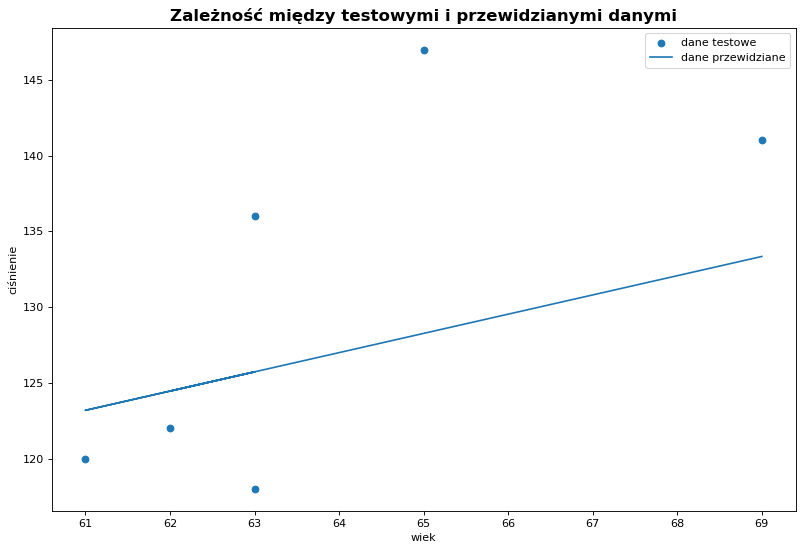

Średni błąd bezwzględny: 8.33899606071139
Błąd średniokwadratowy: 9.927068072392261
Pierwiastek błędu średniokwadratowego : 98.5466805139098



In [3]:
df = pd.read_csv("SBP.csv")
#3
plt.figure(figsize=(12, 8), dpi=80)
plt.scatter(df['Age'],df['SBP'])

plt.title("Ciśnienie w zależności od wieku")
plt.xlabel("wiek")
plt.ylabel("ciśnienie")
plt.show()

#4
y, X = dmatrices("SBP ~ Age",df)
X_train, X_test, y_train, y_test = sms.train_test_split(X, y, test_size=0.30, random_state=0)
#5
clf = slm.LinearRegression()
clf.fit(X_train,y_train)

#6
print("Współczynnik dla problemu liniowej regresji:", clf.coef_)
print("Punkt przecięcia z osią wspołrzędnych", clf.intercept_)

#7
y_pred = clf.predict(X_test)
y_testA = y_test
print("")
print("Y_testowe", "Y_przewidziane")
for i in range(len(y_test)):
    print(y_testA[i],"      ",y_pred[i])


#8
plt.figure(figsize=(12, 8), dpi=80)
plt.title("Zależność między testowymi i przewidzianymi danymi", fontsize=15, weight='bold')
plt.scatter(X_test[:, 1], y_testA,  label="dane testowe")
plt.plot(X_test[:,1], y_pred, label = "dane przewidziane")
plt.xlabel("wiek")
plt.ylabel("ciśnienie")
plt.legend()
plt.show()


print(f"Średni błąd bezwzględny: {mean_absolute_error(y_test, y_pred)}")
print(f"Błąd średniokwadratowy: {mean_squared_error(y_test, y_pred, squared=False)}")
print(f"Pierwiastek błędu średniokwadratowego : {mean_squared_error(y_test, y_pred, squared=True)}\n")


Uzyskano większe wartości błędów - zwłaszcza pierwiastka błędu średniokwadratowego. Może być to spowodowane faktem, że dane wejściowe były bardziej chaotycznie rozłożone i wynik losowania danych testów był niekorzystny - zostały wybrane dane do których ciężej jest dopasować prostą.

### Zadanie 2
Na podstawie danych zawartych w pliku PETROL.csv wykonaj i oceń regresję liniową. Jako daną zależną wykorzystaj zużycie paliwa, a pozostałe - jako predyktory. Wykonanie zadania powinno składać się z kroków podobnych do tych z zadania poprzedniego.

Czy uzyskane wyniki predykcji modelu są dobre? Co mogło mieć pozytywny/negatywny wpływ na taki wynik?

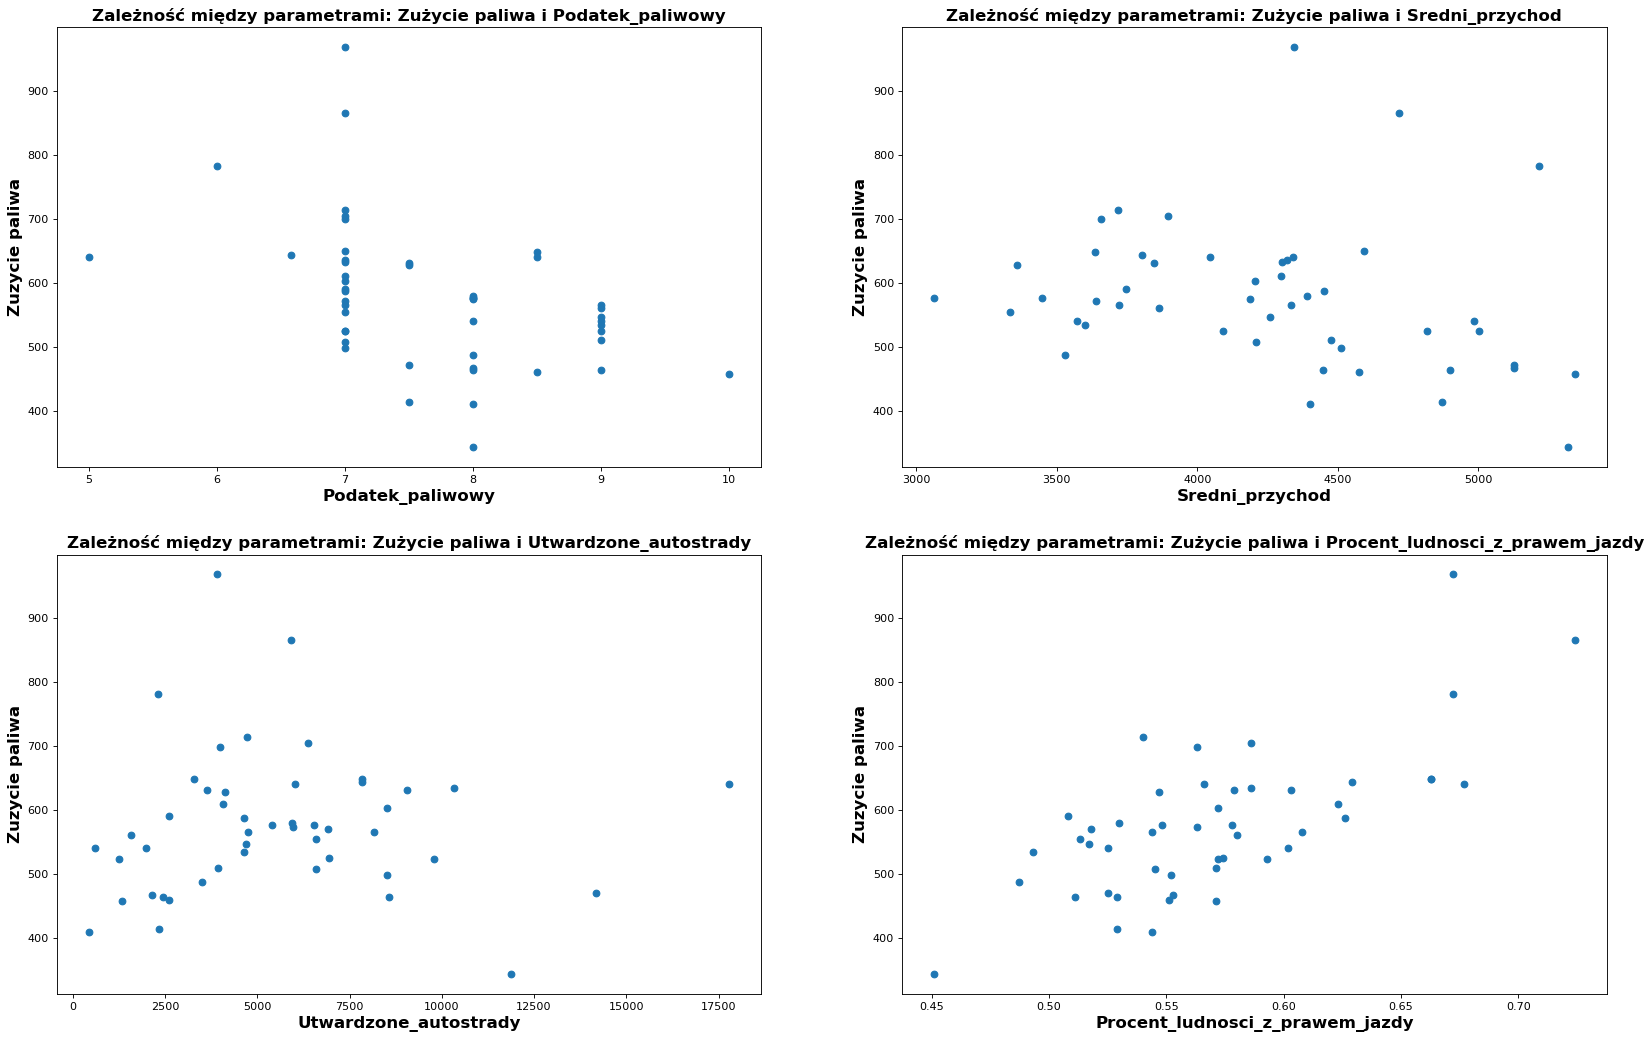

In [4]:
df = pd.read_csv("PETROL.csv")
y_label = "Zuzycie_paliwa"
x_labels = ["Podatek_paliwowy", "Sredni_przychod", "Utwardzone_autostrady", "Procent_ludnosci_z_prawem_jazdy"]
y =df[y_label]
X = df[x_labels] 

fig, axes = plt.subplots( ncols=2,nrows=2,figsize=(25, 16), dpi = 80)

ax1, ax2, ax3, ax4 = axes.flatten()
list_ax = [ax1, ax2, ax3, ax4]
for i in range(4):
    list_ax[i].scatter(df[x_labels[i]],y)
    list_ax[i].set_title(f"Zależność między parametrami: Zużycie paliwa i {x_labels[i]}", fontsize=15, weight='bold')
    list_ax[i].set_ylabel("Zuzycie paliwa", fontsize=15, weight='bold')
    list_ax[i].set_xlabel(x_labels[i], fontsize=15, weight='bold')


In [5]:

y, X0 = dmatrices("Zuzycie_paliwa ~ Podatek_paliwowy", df)
y, X1 = dmatrices("Zuzycie_paliwa ~ Sredni_przychod", df)
y, X2 = dmatrices("Zuzycie_paliwa ~ Utwardzone_autostrady", df)
y, X3 = dmatrices("Zuzycie_paliwa ~ Procent_ludnosci_z_prawem_jazdy", df)


X_train0, X_test0, y_train0, y_test0 = sms.train_test_split(X0, y, train_size=0.30, random_state=0)
X_train1, X_test1, y_train1, y_test1 = sms.train_test_split(X1, y, train_size=0.30, random_state=0)
X_train2, X_test2, y_train2, y_test2 = sms.train_test_split(X2, y, train_size=0.30, random_state=0)
X_train3, X_test3, y_train3, y_test3 = sms.train_test_split(X3, y, train_size=0.30, random_state=0)


#5
clf0 = slm.LinearRegression()
clf0.fit(X_train0,y_train0)

clf1 = slm.LinearRegression()
clf1.fit(X_train1,y_train1)

clf2 = slm.LinearRegression()
clf2.fit(X_train2,y_train2)

clf3 = slm.LinearRegression()
clf3.fit(X_train3,y_train3)



print("Współczynnik dla problemu liniowej regresji:", clf0.coef_)
print("Punkt przecięcia z osią wspołrzędnych", clf0.intercept_)
print("Współczynnik dla problemu liniowej regresji:", clf1.coef_)
print("Punkt przecięcia z osią wspołrzędnych", clf1.intercept_)
print("Współczynnik dla problemu liniowej regresji:", clf2.coef_)
print("Punkt przecięcia z osią wspołrzędnych", clf2.intercept_)
print("Współczynnik dla problemu liniowej regresji:", clf3.coef_)
print("Punkt przecięcia z osią wspołrzędnych", clf3.intercept_)


Współczynnik dla problemu liniowej regresji: [[  0.         -52.83381364]]
Punkt przecięcia z osią wspołrzędnych [973.34293948]
Współczynnik dla problemu liniowej regresji: [[ 0.         -0.06331276]]
Punkt przecięcia z osią wspołrzędnych [856.6570582]
Współczynnik dla problemu liniowej regresji: [[ 0.         -0.00364893]]
Punkt przecięcia z osią wspołrzędnych [591.26077201]
Współczynnik dla problemu liniowej regresji: [[   0.         1814.25643117]]
Punkt przecięcia z osią wspołrzędnych [-461.01292765]


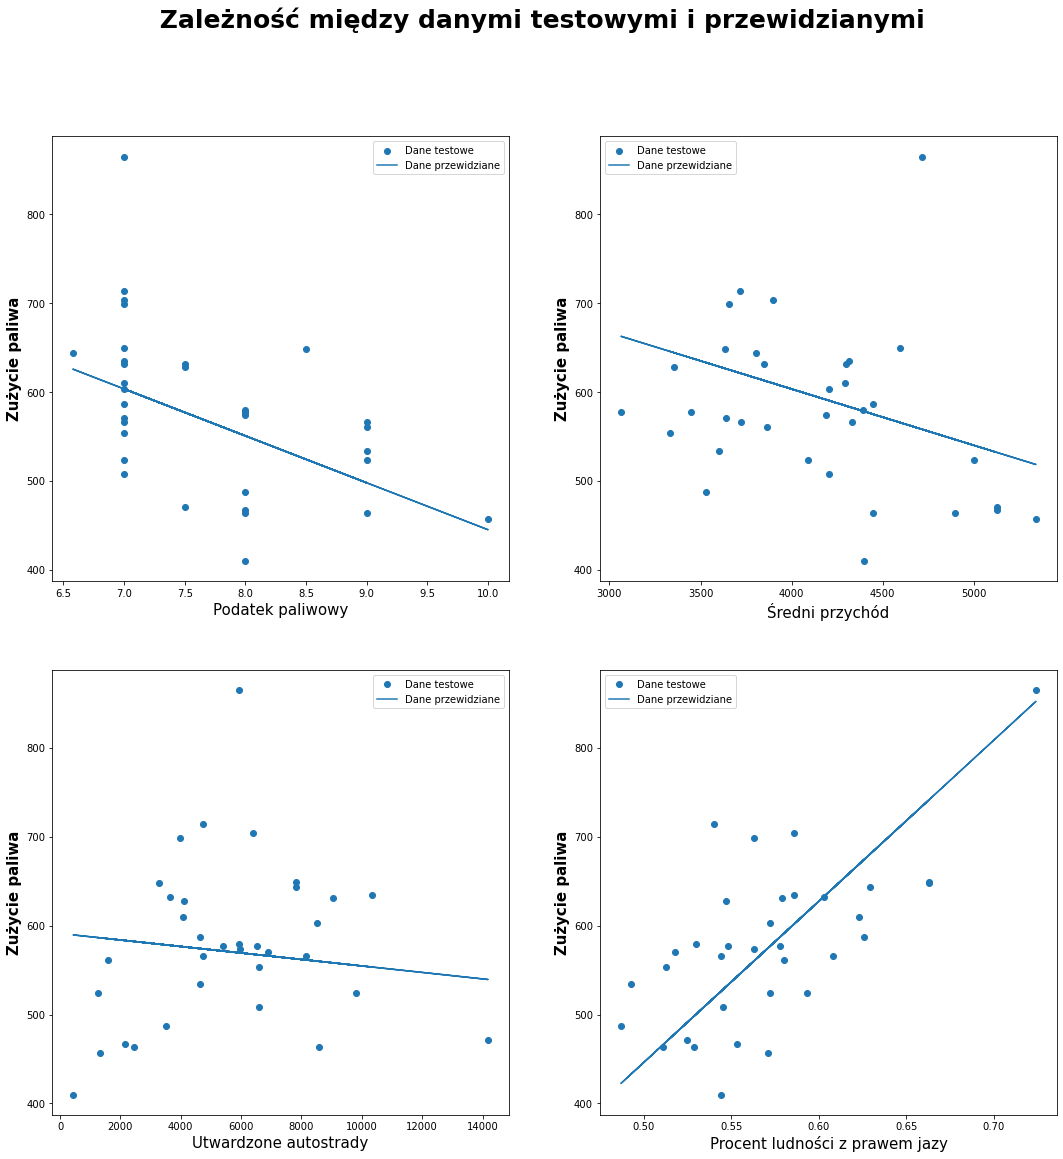

In [6]:
y_pred0 = clf0.predict(X_test0)
y_pred1 = clf1.predict(X_test1)
y_pred2 = clf2.predict(X_test2)
y_pred3 = clf3.predict(X_test3)


fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(18,18))
fig.suptitle(" Zależność między danymi testowymi i przewidzianymi", fontsize=25, weight='bold')
ax[0,0].scatter(X_test0[:, 1], y_test0, label = "Dane testowe")
ax[0,0].plot(X_test0[:, 1], y_pred0, label = "Dane przewidziane")
ax[0,0].set_xlabel("Podatek paliwowy", fontsize=15)
ax[0,0].set_ylabel("Zużycie paliwa", fontsize=15, weight='bold')
ax[0,0].legend()

ax[0,1].scatter(X_test1[:, 1], y_test1, label = "Dane testowe")
ax[0,1].plot(X_test1[:, 1], y_pred1, label = "Dane przewidziane")
ax[0,1].set_xlabel("Średni przychód", fontsize=15)
ax[0,1].set_ylabel("Zużycie paliwa", fontsize=15, weight='bold')
ax[0,1].legend()

ax[1,0].scatter(X_test2[:, 1], y_test2, label = "Dane testowe")
ax[1,0].plot(X_test2[:, 1], y_pred2, label = "Dane przewidziane")
ax[1,0].set_xlabel("Utwardzone autostrady", fontsize=15)
ax[1,0].set_ylabel("Zużycie paliwa", fontsize=15, weight='bold')
ax[1,0].legend()

ax[1,1].scatter(X_test3[:, 1], y_test3, label = "Dane testowe")
ax[1,1].plot(X_test3[:, 1], y_pred3, label = "Dane przewidziane")
ax[1,1].set_xlabel("Procent ludności z prawem jazy", fontsize=15)
ax[1,1].set_ylabel("Zużycie paliwa", fontsize=15, weight='bold')
ax[1,1].legend()



In [7]:
tab_ypred = [y_pred0, y_pred1, y_pred2, y_pred3]
tab_ytest = [y_test0, y_test2, y_test3, y_test3]
for x in range(4):
    print(f"Średni błąd bezwzględny: {mean_absolute_error(tab_ytest[x], tab_ypred[x])}")
    print(f"Błąd średniokwadratowy: {mean_squared_error(tab_ytest[x], tab_ypred[x], squared=False)}")
    print(f"Pierwiastek błędu średniokwadratowego : {mean_squared_error(tab_ytest[x], tab_ypred[x], squared=True)}\n")

Średni błąd bezwzględny: 60.70387636322539
Błąd średniokwadratowy: 78.55591158292584
Pierwiastek błędu średniokwadratowego : 6171.0312446244625

Średni błąd bezwzględny: 67.08895726621695
Błąd średniokwadratowy: 87.8649912445262
Pierwiastek błędu średniokwadratowego : 7720.256686400665

Średni błąd bezwzględny: 69.34409593423165
Błąd średniokwadratowy: 92.31792192836507
Pierwiastek błędu średniokwadratowego : 8522.598709171707

Średni błąd bezwzględny: 64.16212742597679
Błąd średniokwadratowy: 77.35397757111132
Pierwiastek błędu średniokwadratowego : 5983.637846071993



Wieksza ilość zmiennych, które wpływają nam na wyniki w znacznym stopniu pogarsza rozwiązanie. Predyktory nie zostały znormalizowane i te o większej wartości miały wpływ większy na wynik co mogło pogorszyć rezultat

### Regresja logistyczna

Naturalnym rozwojem modeli linowych, są uogólnione modele liniowe (*generalized linear models*). 

Ich przewodnią ideą jest to, że zamiast reprezentować zmienną zależną jako kombinację liniową niezależnych, staramy się stworzyć model liniowy pewnej funkcji zmiennej zależnej.

$$ f(y) =  \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

wymaga się, aby funkcja ta była odwracalna, dzięki czemu 

$$ y = f^{-1} ( \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n)$$

Takie przekształcenie stosujemy wtedy, gdy zbiór wartości zmiennej zależnej nie jest całym zbiorem liczb rzeczywistych tylko jest w jakiś sposób ograniczony. Na przykład do przedziału $[0,1]$, do wartości dodatnich lub wartości całkowitych. W tens posób można wybrać funkcję $f$, której dziedziną jest zbiór wartości $y$ zaś obrazem jest zbiór liczb rzeczywistych.

Jedną z takich funkcji jest tzw. funkcja logistyczna, która odpowiada zbiorowi $[0,1]$ przez co często jest wykorzystywana do analizy prawdopodobieństwa przynależności do danej klasy, lub też inaczej jako klasyfikator.

W takiej sytuacji zmienne zależne powinny przyjmować wyłącznie wartości $0$ i $1$ co odpowiada temu czy dany punkt należy do interesującej klasy. Model logistyczny poznwala na określenie estymaty prawdopodobieństwa, czy punkt należy czy nie do danej klasy. 

Do tworzenia modeli logistycznyc służy klasa: ```LogisticRegression```

### Zadanie 3

Na podstawie danych zawartych w pliku HEART.csv wykonaj i oceń regresję logistyczną, gdzie Twoją daną zależną jest kolumna "num". Wykonanie zadania powinno składać się z następujących kroków:

1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytanie danych z pliku HEART.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Przetworzenie danych, tj: oznaczenie braku danych ("?") na NaN, usunięcię kolumn zawierających zbyt dużo brakujących danych (3 kolumny), usunięcie wierszy z brakującymi wartościami.
4. Zakoduj niezależne zmienne kategorialne np: jako wartości "dummy", za pomoca metody get_dummies(). Zmienne kategorialne to takie, które reprezentuja przynależność do kategorii. W przypadku naszych odfiltrowanych danych będą to kolumny: cp, restecg, fbs, sex, exang. Jako, że trzy ostatnie już zapisane są w formie 0 i 1 tylko cp i restecg wymagają tej operacji.
5. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zależnych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (20%).
6. Utwróz model regresji logistycznej.
7. Oceń wynik za pomocą dostępnych metryk (np: metody związane z modelem czy classification_report() z sklearn)

Możesz również spróbować ustandaryzować dane (np: poprzez skalowanie) po podziale na zbiory treningowy i testowy.

In [11]:
# 2 i 3
df = pd.read_csv("HEART.csv")
df[df == "?"] = float("NaN")
df = df.dropna(axis=1,thresh = 250)
df = df.dropna(thresh = 11)

#4
df_X = df[["fbs","sex","exang", "cp", "restecg"]]
df_dummy = pd.get_dummies(df_X,columns=["cp", "restecg"], drop_first=True)
y = df["num"]
X = df_dummy.loc[:, df_dummy.columns]


#5
X_train, X_test, y_train, y_test = sms.train_test_split(X, y, test_size=0.20, random_state=0)

#6
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X_train, y_train)
print(f"Współczynnik nachylenia: {model.coef_}")
print(f"Punkt przecięcia: {model.intercept_}")
y_pred  = model.predict(X_test)

#7
print(f'Dokładność modelu: {model.score(X_test, y_test)}')

# Wyniki są zadowalajace - dokładność modelu; 81%



Współczynnik nachylenia: [[ 0.96509423  1.03630317  1.84784854 -1.52651071 -0.54207582  0.57722034
  -0.11620685 -0.39000795]]
Punkt przecięcia: [-1.75091694]
Dokładność modelu: 0.8301886792452831


In [9]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       137
           1       0.80      0.62      0.70        72

    accuracy                           0.82       209
   macro avg       0.81      0.77      0.79       209
weighted avg       0.82      0.82      0.81       209

